In [45]:
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import preprocessing

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from matplotlib import pyplot as plt

import seaborn as sns

from sklearn.linear_model import LinearRegression

import numpy as np

from sklearn.metrics import f1_score

In [46]:
df = pd.read_csv('UFC_Dataset.csv')
df.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,20/03/2021,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,20/03/2021,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,20/03/2021,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,20/03/2021,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,20/03/2021,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


In [47]:
sum(df.duplicated())

0

In [48]:
df = df.drop(['R_fighter','B_fighter','Referee','date','location','weight_class'], axis=1)
df = df.dropna()
df.head()

,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Red,False,0.000000,0.000,0.420000,0.495000,0.330000,0.360000,0.500000,1.0000,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Red,False,0.500000,0.000,0.660000,0.305000,0.300000,0.500000,1.500000,0.0000,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
4,Blue,False,0.125000,0.000,0.535625,0.578750,0.185000,0.166250,0.125000,0.1875,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0
5,Blue,False,0.000000,0.000,0.515000,0.473750,0.435000,0.250000,1.250000,0.6250,...,2,2,2,0,Orthodox,182.88,190.50,155.0,27.0,41.0
6,Blue,False,0.046875,0.125,0.459277,0.404687,0.322188,0.068867,0.189453,0.0000,...,1,3,0,0,Orthodox,182.88,180.34,170.0,35.0,31.0


In [49]:
print(df['Winner'].unique())

['Red' 'Blue' 'Draw']


In [50]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
winner_encoder=le.fit_transform(df['Winner'])
df["Winner"] = winner_encoder
# Red ==2
# Blue ==0
# Draw ==1
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Winner,title_bout,B_avg_KD,B_avg_opp_KD,B_avg_SIG_STR_pct,B_avg_opp_SIG_STR_pct,B_avg_TD_pct,B_avg_opp_TD_pct,B_avg_SUB_ATT,B_avg_opp_SUB_ATT,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,2,False,0.000000,0.000,0.420000,0.495000,0.330000,0.360000,0.500000,1.0000,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,2,False,0.500000,0.000,0.660000,0.305000,0.300000,0.500000,1.500000,0.0000,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
4,0,False,0.125000,0.000,0.535625,0.578750,0.185000,0.166250,0.125000,0.1875,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0
5,0,False,0.000000,0.000,0.515000,0.473750,0.435000,0.250000,1.250000,0.6250,...,2,2,2,0,Orthodox,182.88,190.50,155.0,27.0,41.0
6,0,False,0.046875,0.125,0.459277,0.404687,0.322188,0.068867,0.189453,0.0000,...,1,3,0,0,Orthodox,182.88,180.34,170.0,35.0,31.0


In [51]:
rstance_encoder=le.fit_transform(df['R_Stance'])
bstance_encoder=le.fit_transform(df['B_Stance'])
df["B_Stance"].unique()
# Red ==2
# Blue ==0
# Draw ==1

array(['Orthodox', 'Switch', 'Southpaw', 'Open Stance'], dtype=object)

In [52]:
df["R_Stance"] = rstance_encoder
df["B_Stance"] = bstance_encoder
#Orthodox == 1
#Southpaw == 0
df["R_Stance"].unique()

array([1, 2, 3, 0])

In [53]:
titlebout_encoder=le.fit_transform(df['title_bout'])
df["title_bout"]

0       False
1       False
4       False
5       False
6       False
        ...  
5759     True
5767    False
5799     True
5840    False
5884    False
Name: title_bout, Length: 3914, dtype: bool

In [54]:
df["title_bout"] = titlebout_encoder
df["title_bout"]
#False == 0
#True == 1


0       0
1       0
4       0
5       0
6       0
       ..
5759    1
5767    0
5799    1
5840    0
5884    0
Name: title_bout, Length: 3914, dtype: int64

In [55]:
df = df[df["Winner"]!=1]
df= df.dropna()


In [56]:
print(df[df["Winner"]==1].count())

Winner               0
title_bout           0
B_avg_KD             0
B_avg_opp_KD         0
B_avg_SIG_STR_pct    0
                    ..
R_Height_cms         0
R_Reach_cms          0
R_Weight_lbs         0
B_age                0
R_age                0
Length: 138, dtype: int64


In [57]:
df["R_Stance"].value_counts()

1    2892
2     831
3     112
0      10
Name: R_Stance, dtype: int64

In [58]:
df["B_Height_cms"].max()

210.82

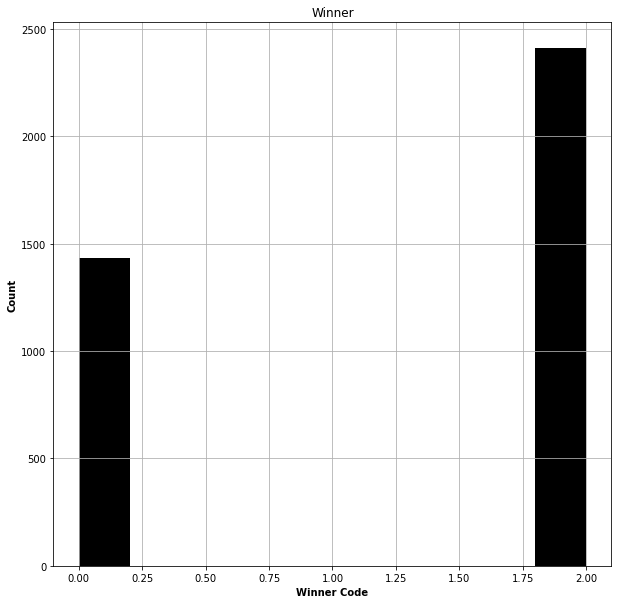

In [59]:
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
df.hist(column='Winner', color = "black")
plt.xlabel("Winner Code",fontweight="bold")
plt.ylabel("Count",fontweight="bold")
figsize(10,10)

In [60]:
stance = df['R_Stance'].tolist()
stance1 = df['B_Stance'].tolist()
for i in stance1:
  stance.append(i)
df["Stance"] = pd.DataFrame (stance, columns = ['Stance'])
df["Stance"].value_counts()

1    2890
2     805
3     144
0       6
Name: Stance, dtype: int64

In [61]:
age = df["R_age"].to_list()
b_age = df["B_age"].to_list()
for i in b_age:
  age.append(i)
df["Age"] = pd.DataFrame(age, columns = ['Age'])
df.Age.min()

19.0

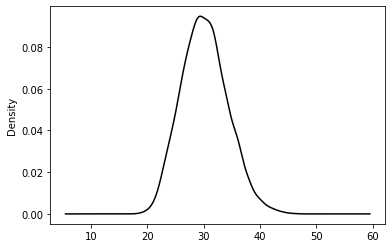

In [90]:
df.Age.plot(kind = "kde", color = "black")

In [91]:
age = df["R_Height_cms"].to_list()
b_age = df["B_Height_cms"].to_list()
for i in b_age:
  age.append(i)
df["Height"] = pd.DataFrame(age, columns = ['Height'])
df.Age.min()

19.0

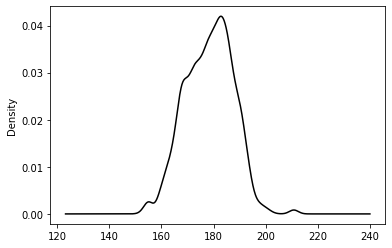

In [92]:
df.Height.plot(kind = "kde", color = "black")

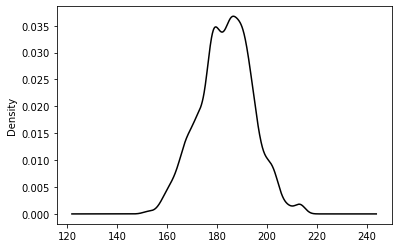

In [94]:
age = df["R_Reach_cms"].to_list()
b_age = df["B_Reach_cms"].to_list()
for i in b_age:
  age.append(i)
df["Reach"] = pd.DataFrame(age, columns = ['Reach'])
df.Age.min()
df.R_Reach_cms.plot(kind = "kde", color = "black")

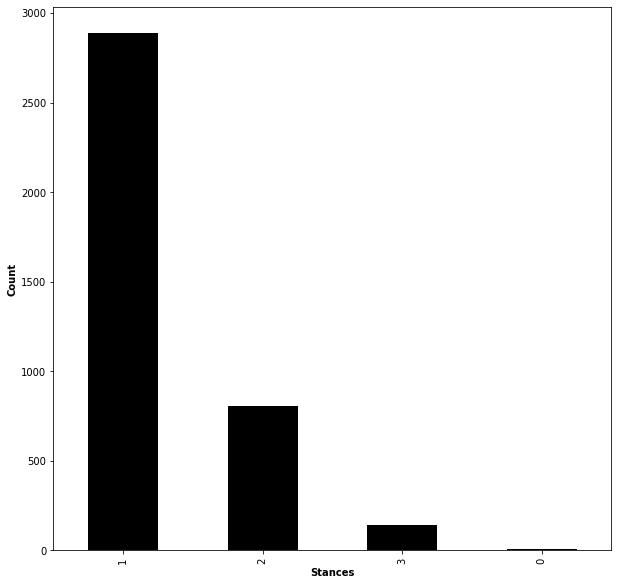

In [62]:
from IPython.core.pylabtools import figsize
import matplotlib.pyplot as plt
df["Stance"].value_counts().plot(kind='bar',color = "black")
plt.xlabel("Stances",fontweight="bold")
plt.ylabel("Count",fontweight="bold")


figsize(10,10)

In [63]:
df.R_Reach_cms.min()

152.4

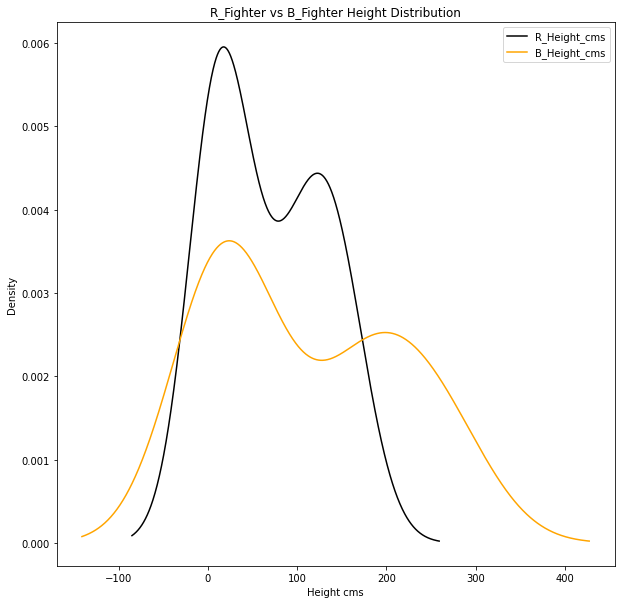

In [64]:
reach = df['R_Height_cms'].tolist()
stance1 = df['B_Height_cms'].tolist()
for i in stance1:
  reach.append(i)
df["Height"] = pd.DataFrame (reach, columns = ['Height'])
ax = df.query("Winner ==0").groupby("R_Height_cms").R_Height_cms.count().plot(kind = "kde", color = "black")
df.query("Winner==2").groupby("B_Height_cms").B_Height_cms.count().plot(ax = ax, kind = "kde", color = "orange")
plt.xlabel("Height cms")
plt.title("R_Fighter vs B_Fighter Height Distribution")
plt.legend()

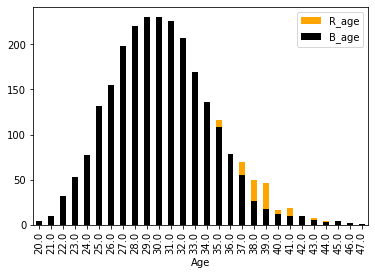

In [98]:
ax = df.query("Winner ==0").groupby("R_age").R_age.count().plot(kind = "bar", color = "orange")
df.query("Winner==2").groupby("B_age").B_age.count().plot(ax = ax, kind = "bar", color = "black")
plt.xlabel("Age")
plt.legend()

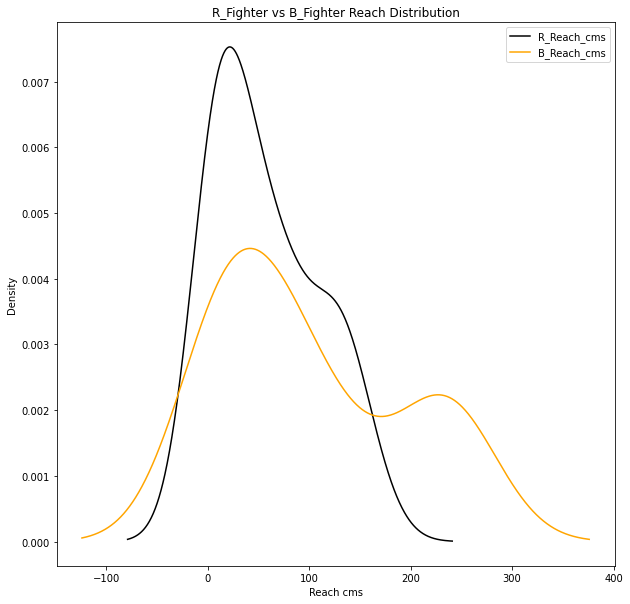

In [65]:
reach = df['R_Reach_cms'].tolist()
stance1 = df['B_Reach_cms'].tolist()
for i in stance1:
  reach.append(i)
df["Reach"] = pd.DataFrame (reach, columns = ['Reach'])
ax = df.query("Winner ==0").groupby("R_Reach_cms").R_Reach_cms.count().plot(kind = "kde", color = "black")
df.query("Winner==2").groupby("B_Reach_cms").B_Reach_cms.count().plot(ax = ax, kind = "kde", color = "orange")
plt.xlabel("Reach cms")
plt.title("R_Fighter vs B_Fighter Reach Distribution")
plt.legend()

In [66]:
from sklearn.utils import resample

# Separate input features and target
y = df.Winner
X = df.drop('Winner', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
R_Win = X[X.Winner==0]
R_Lose = X[X.Winner==2]

# upsample minority
Winner_upsampled = resample(R_Win,
                          replace=True, # sample with replacement
                          n_samples=len(R_Lose), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([R_Lose, Winner_upsampled])

# check new class counts
upsampled.Winner.value_counts()

2    1921
0    1921
Name: Winner, dtype: int64

In [67]:
y_train = upsampled.Winner
X_train = upsampled.drop('Winner', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

In [68]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [69]:
model = LogisticRegression()

In [70]:
model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [71]:
X_test_scaled = scaler.transform(X_test)
y_pred = model.predict(X_test_scaled)

In [72]:
predictions = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [73]:
train_acc = model.score(X_train_scaled, y_train)
print("The Accuracy for Training Set is {}".format(train_acc*100) +"%")

The Accuracy for Training Set is 67.38677771993753%


In [74]:

test_acc = accuracy_score(y_test, upsampled_pred)
print("The Accuracy for Test Set is {}".format(test_acc*100)+"%")

The Accuracy for Test Set is 61.378413524057216%


In [75]:
print(classification_report(y_test, upsampled_pred))

              precision    recall  f1-score   support

           0       0.47      0.59      0.53       279
           2       0.73      0.63      0.67       490

    accuracy                           0.61       769
   macro avg       0.60      0.61      0.60       769
weighted avg       0.64      0.61      0.62       769



# **Decision Tree**

In [76]:
import pandas
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

In [77]:
features = df.columns
features = features.drop("Winner")
print(features)

Index(['title_bout', 'B_avg_KD', 'B_avg_opp_KD', 'B_avg_SIG_STR_pct',
       'B_avg_opp_SIG_STR_pct', 'B_avg_TD_pct', 'B_avg_opp_TD_pct',
       'B_avg_SUB_ATT', 'B_avg_opp_SUB_ATT', 'B_avg_REV',
       ...
       'R_Stance', 'R_Height_cms', 'R_Reach_cms', 'R_Weight_lbs', 'B_age',
       'R_age', 'Stance', 'Age', 'Height', 'Reach'],
      dtype='object', length=141)


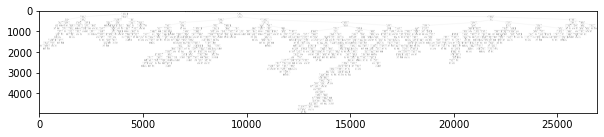

In [78]:
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train, y_train)
data = tree.export_graphviz(dtree, out_file=None, feature_names=features)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()

In [79]:
res_pred = dtree.predict(X_test)
score = accuracy_score(y_test, res_pred)
score


0.5565669700910273

In [80]:
print(classification_report(y_test, res_pred))

              precision    recall  f1-score   support

           0       0.38      0.36      0.37       279
           2       0.65      0.67      0.66       490

    accuracy                           0.56       769
   macro avg       0.51      0.51      0.51       769
weighted avg       0.55      0.56      0.55       769



# **Feature Selection**

In [81]:
%matplotlib inline
import pandas as pd
import pandas.testing as tm
import numpy as np
import itertools
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [82]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [83]:
import math
import numpy
cor = df.corr()
cor_target = abs(cor["Winner"])
relavent_features = cor_target[cor_target >0.09]
relavent_features = relavent_features.drop("Winner")
relavent_features = relavent_features.to_frame()
relavent_features_names = relavent_features.index.values.tolist()
relavent_features_names
relavent_features = relavent_features["Winner"].tolist()
relavent_features_names


['B_avg_SIG_STR_att',
 'B_avg_SIG_STR_landed',
 'B_avg_HEAD_landed',
 'B_avg_BODY_att',
 'B_avg_DISTANCE_att',
 'B_avg_DISTANCE_landed',
 'R_avg_opp_SIG_STR_att',
 'R_avg_opp_SIG_STR_landed',
 'R_avg_opp_HEAD_landed',
 'R_avg_opp_BODY_att',
 'R_avg_opp_BODY_landed',
 'R_avg_opp_DISTANCE_landed',
 'R_avg_GROUND_att',
 'R_losses',
 'R_win_by_Decision_Split',
 'R_age']

In [84]:
pandas_df = df[df.columns.intersection(relavent_features_names)]
pandas_df.head(5)


,B_avg_SIG_STR_att,B_avg_SIG_STR_landed,B_avg_HEAD_landed,B_avg_BODY_att,B_avg_DISTANCE_att,B_avg_DISTANCE_landed,R_avg_opp_SIG_STR_att,R_avg_opp_SIG_STR_landed,R_avg_opp_HEAD_landed,R_avg_opp_BODY_att,R_avg_opp_BODY_landed,R_avg_opp_DISTANCE_landed,R_avg_GROUND_att,R_losses,R_win_by_Decision_Split,R_age
0,50.000000,20.000000,11.000000,7.500000,35.000000,12.500000,13.000000,6.000000,5.000000,2.000000,1.000000,6.000000,0.000000,0,0,27.0
1,65.500000,35.000000,20.000000,12.000000,58.000000,30.000000,69.156250,27.593750,13.343750,9.093750,6.156250,23.125000,12.281250,2,1,28.0
4,109.187500,57.937500,31.375000,31.187500,33.562500,11.000000,148.846680,84.554688,38.693359,37.717773,31.658203,48.479492,4.489258,6,0,43.0
5,86.000000,40.750000,23.125000,10.000000,68.875000,29.625000,78.617188,32.046875,14.320312,16.726562,11.304688,25.156250,10.414062,1,1,41.0
6,130.818359,60.113281,38.814453,20.951172,125.130859,55.888672,61.062500,26.500000,19.062500,5.562500,4.187500,23.687500,1.687500,1,0,31.0


No handles with labels found to put in legend.


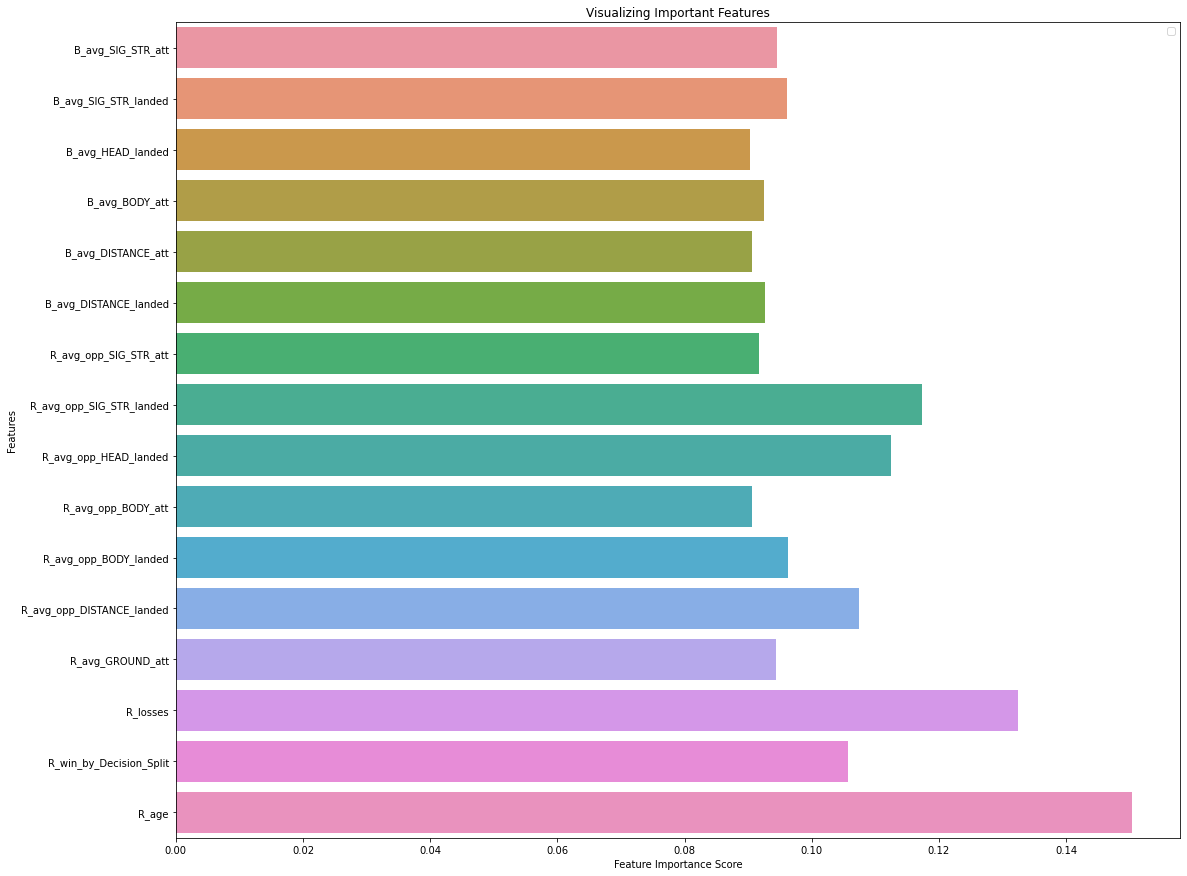

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=relavent_features, y=relavent_features_names)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.gcf().set_size_inches(18, 15)
plt.show()

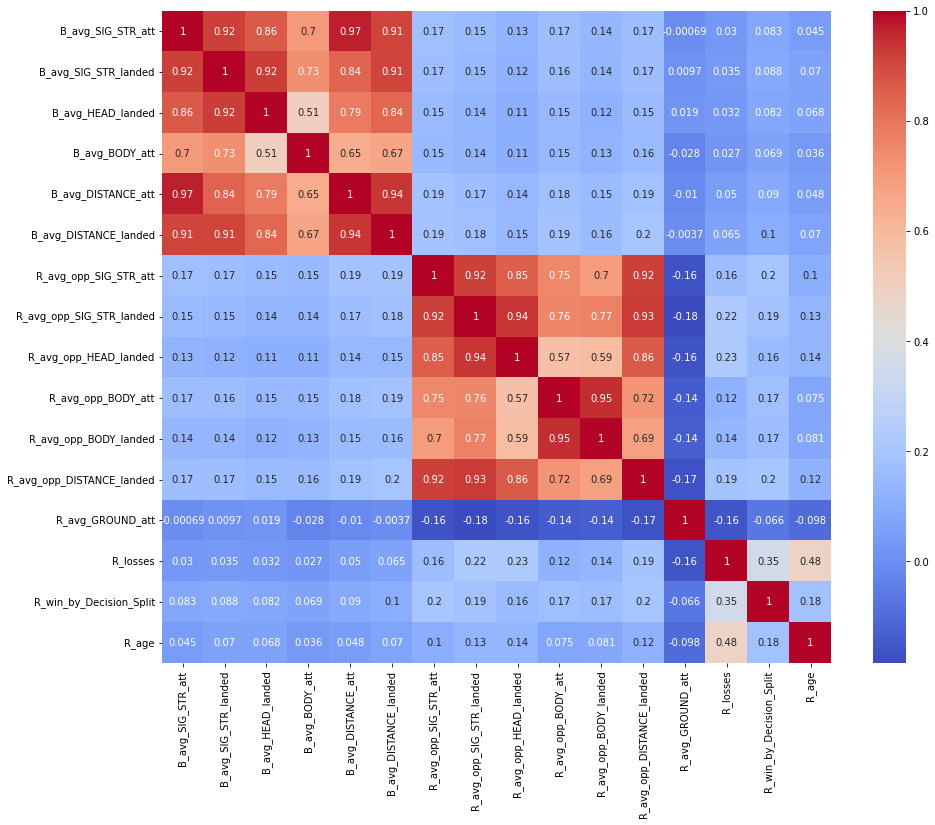

In [86]:
import seaborn

plt.figure(figsize=(15,12))
seaborn.heatmap(pandas_df.corr(),annot=True,cmap=("coolwarm"))


In [87]:
pd.DataFrame(pandas_df.mean(),columns = ["Mean"])

,Mean
B_avg_SIG_STR_att,80.889164
B_avg_SIG_STR_landed,35.419449
B_avg_HEAD_landed,22.786906
B_avg_BODY_att,10.300788
B_avg_DISTANCE_att,64.092976
B_avg_DISTANCE_landed,23.931277
R_avg_opp_SIG_STR_att,80.698176
R_avg_opp_SIG_STR_landed,33.565877
R_avg_opp_HEAD_landed,21.158864
R_avg_opp_BODY_att,10.186184


In [ ]:
pd.DataFrame(pandas_df.std(),columns = ["Standard Deviation"])

,Standard Deviation
B_avg_SIG_STR_att,50.770101
B_avg_SIG_STR_landed,21.862052
B_avg_HEAD_landed,15.252317
B_avg_BODY_att,8.461966
B_avg_DISTANCE_att,48.471781
B_avg_DISTANCE_landed,19.340236
R_avg_opp_SIG_STR_att,50.634097
R_avg_opp_SIG_STR_landed,21.610290
R_avg_opp_HEAD_landed,15.379231
R_avg_opp_BODY_att,7.704707


In [ ]:
from sklearn.utils import resample

# Separate input features and target
y = df.Winner
X = pandas_df

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
R_Win = X[X.Winner==0]
R_Lose = X[X.Winner==2]

# upsample minority
Winner_upsampled = resample(R_Win,
                          replace=True, # sample with replacement
                          n_samples=len(R_Lose), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([R_Lose, Winner_upsampled])

# check new class counts
upsampled.Winner.value_counts()

2    1796
0    1796
Name: Winner, dtype: int64

In [ ]:
y_train = upsampled.Winner
X_train = upsampled.drop('Winner', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

# **Featured Decision Tree**

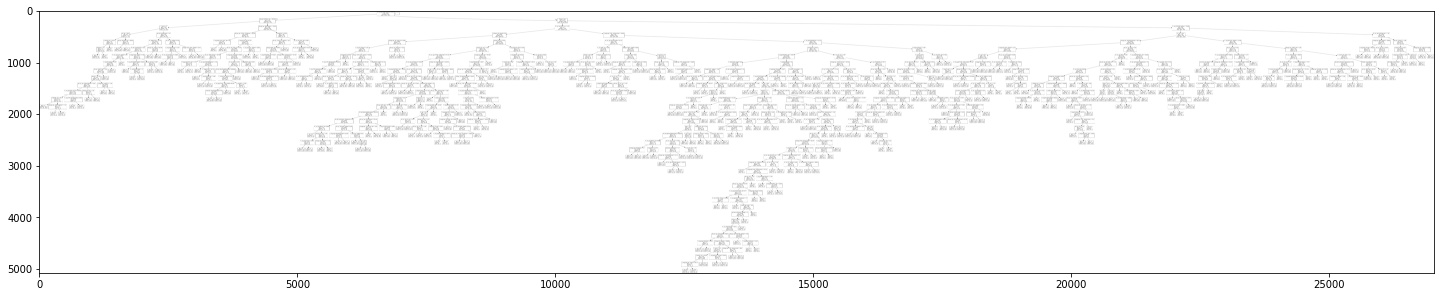

In [ ]:
dtree1 = DecisionTreeClassifier()
dtree1 = dtree1.fit(X_train, y_train)
data = tree.export_graphviz(dtree1, out_file=None, feature_names=relavent_features_names)
graph = pydotplus.graph_from_dot_data(data)
graph.write_png('mydecisiontree_featured.png')

img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.gcf().set_size_inches(25, 20)


plt.show()

In [ ]:
print(pandas_df.columns)

Index(['B_avg_SIG_STR_att', 'B_avg_SIG_STR_landed', 'B_avg_HEAD_landed',
       'B_avg_BODY_att', 'B_avg_DISTANCE_att', 'B_avg_DISTANCE_landed',
       'R_avg_opp_SIG_STR_att', 'R_avg_opp_SIG_STR_landed',
       'R_avg_opp_HEAD_landed', 'R_avg_opp_BODY_att', 'R_avg_opp_BODY_landed',
       'R_avg_opp_DISTANCE_landed', 'R_avg_GROUND_att', 'R_losses',
       'R_win_by_Decision_Split', 'R_age'],
      dtype='object')


In [ ]:
import random

random_numlist = []

for i in range(16):
  n = random.randint(0,60)
  random_numlist.append(n)


In [ ]:

print(dtree1.predict([random_numlist]))
print("[2] means 'Red Loses'")
print("[0] means 'Red Wins'")

[2]
[2] means 'Red Loses'
[0] means 'Red Wins'


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
res_pred = dtree1.predict(X_test)
score = accuracy_score(y_test, upsampled_pred)
DT_accuracy = score


In [ ]:
print(classification_report(y_test, upsampled_pred))

              precision    recall  f1-score   support

           0       0.45      0.56      0.50       347
           2       0.71      0.61      0.65       615

    accuracy                           0.59       962
   macro avg       0.58      0.58      0.58       962
weighted avg       0.62      0.59      0.60       962



# **Random Forest Classifier**

In [ ]:
from sklearn.utils import resample

# Separate input features and target
y = df.Winner
X = pandas_df


# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
R_Win = X[X.Winner==0]
R_Lose = X[X.Winner==2]

# upsample minority
Winner_upsampled = resample(R_Win,
                          replace=True, # sample with replacement
                          n_samples=len(R_Lose), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([R_Lose, Winner_upsampled])

# check new class counts
upsampled.Winner.value_counts()

2    1796
0    1796
Name: Winner, dtype: int64

In [ ]:
y_train = upsampled.Winner
X_train = upsampled.drop('Winner', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

upsampled_pred = upsampled.predict(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model 
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

In [ ]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
RF_accuracy = metrics.accuracy_score(y_test, y_pred)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.31      0.37       347
           2       0.67      0.80      0.73       615

    accuracy                           0.62       962
   macro avg       0.57      0.55      0.55       962
weighted avg       0.60      0.62      0.60       962



In [ ]:
print(clf.predict([random_numlist]))
print("[2] means 'Red Loses'")
print("[0] means 'Red Wins'")

[2]
[2] means 'Red Loses'
[0] means 'Red Wins'


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
from sklearn.tree import export_graphviz
import pydot
from sklearn.ensemble import RandomForestRegressor

rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(X_train, y_train)
# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = relavent_features_names, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');


# **SVM**

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler() 
X_train1 = sc_X.fit_transform(X_train)
X_test1 = sc_X.fit_transform(X_test)

In [ ]:
from sklearn.svm import SVC

# kernel to be set linear as it is binary class
classifier = SVC(kernel='linear')

# traininf the model
classifier.fit(X_train1, y_train)
y_pred = classifier.predict(X_test1)


In [ ]:
SVM_accuracy = (accuracy_score(y_test, y_pred))

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.45      0.57      0.50       347
           2       0.71      0.60      0.65       615

    accuracy                           0.59       962
   macro avg       0.58      0.59      0.58       962
weighted avg       0.62      0.59      0.60       962



In [ ]:
svm_clf = SVC(gamma="auto")
svm_clf.fit(X_train1,y_train)

SVC(gamma='auto')

In [ ]:
print(svm_clf.predict([random_numlist]))
print("[2] means 'Red Loses'")
print("[0] means 'Red Wins'")

[2]
[2] means 'Red Loses'
[0] means 'Red Wins'


# **Logistic Regression**

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:

y_pred = model.predict(X_test)

In [ ]:
predictions = model.predict(X_test)

In [ ]:

LR_accuracy = accuracy_score(y_test, upsampled_pred)
print("The Accuracy for Test Set is {}".format(LR_accuracy*100)+"%")

The Accuracy for Test Set is 59.04365904365905%


# **ANN**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
NB_accuracy = nb.score(X_test, y_test)

In [ ]:
results = [DT_accuracy,RF_accuracy,SVM_accuracy,LR_accuracy,NB_accuracy]
df_results = pd.DataFrame(results,columns = ["Model Accuracy"], index = ["Decision Tree","Random Forest","SVM","Logistic Regression","Naive Bayes"])
df_results

,Model Accuracy
Decision Tree,0.590437
Random Forest,0.621622
SVM,0.588358
Logistic Regression,0.590437
Naive Bayes,0.574844
